In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\brian\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV,KFold

In [42]:
x_testeo_final= pd.read_csv(r"X_test.csv")

In [43]:
x_testeo_final.shape

(20, 1)

In [44]:
xy= pd.read_csv(r"Xy_train.csv")

In [45]:
xy.shape

(100, 2)

In [46]:
x= xy[['X']]
y = xy['y']

# Linear Regression - Linear Features

In [59]:
kf = KFold(n_splits=10,shuffle=True, random_state=30)
kf.get_n_splits(x)
mean_squared_error_lr=[]
r2_score_lr=[]
mean_abs_error_lr = []
lrcoefs=[]

## Aplicamos k-fold cross-validation
for train_index, test_index in kf.split(x):
    
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    parameters = {'fit_intercept' : [False, True]}
    
    lr= LinearRegression(fit_intercept= True)
    lr.fit(x_train,y_train)
    ypred=lr.predict(x_test)
    
    gs = GridSearchCV(lr, param_grid=parameters, refit=True, scoring="neg_mean_squared_error")
    
    r2_score_lr.append(r2_score(y_test, ypred))
    mean_squared_error_lr.append(mean_squared_error(y_test, ypred))
    mean_abs_error_lr.append(mean_absolute_error(y_test, ypred))
    lrcoefs.append((lr.coef_[0], lr.intercept_))
    
mse_lr = pd.Series(mean_squared_error_lr).mean()
mae_lr = pd.Series(mean_abs_error_lr).mean()
r2_lr = pd.Series(r2_score_lr).mean()

In [60]:
results = pd.DataFrame([[mse_lr, mae_lr, r2_lr]], columns=['mse', 'mae', 'r2'])
results.index = ['Linear Regression']

In [61]:
results

,mse,mae,r2
Linear Regression,3.619663,1.453351,0.208754


In [62]:
# Dejo fiteado un modelo para graficar posteriormente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
lr= LinearRegression(fit_intercept= True)
lr.fit(x_train,y_train)

LinearRegression()

Text(0.0, 1.0, 'Linear Regression')

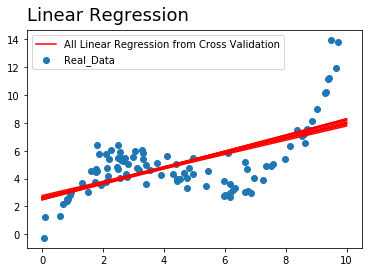

In [63]:
# Grafico todas las curvas generadas en el cross validation:
ax1 = plt.scatter(x, y, label='Real_Data')
i=0
for m, b in lrcoefs:
    xi = np.arange(0, 11, 1)
    ax2, = plt.plot(xi, xi*m + b , c="r")
    i+=1
ax2.set_label('All Linear Regression from Cross Validation')
plt.legend() 
plt.title("Linear Regression", fontsize=18, loc='left', pad=10)

# Linear Regression - Polinomial Features

Often, the input features for a predictive modeling task interact in unexpected and often nonlinear ways.

These interactions can be identified and modeled by a learning algorithm. 

**Another approach is to engineer new features that expose these interactions and see if they improve model performance.**

`En nuestro caso pudimos observar que la data real sigue una distribución polinómica, que en principio pareciera ser` $y=x^3$

These features are called interaction and polynomial features and allow the use of simpler modeling algorithms.

Some of the complexity of interpreting the input variables and their relationships **is pushed back to the data preparation stage.**

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)

grad_poly = [2, 3, 4, 5]

mean_squared_error_lr_poly=[]
r2_score_lr_poly=[]
mean_abs_error_lr_poly = []

for grad in grad_poly:
    x_train_poly = PolynomialFeatures(grad).fit_transform(x_train)
    x_test_poly = PolynomialFeatures(grad).fit_transform(x_test)
    
    lr_poly = LinearRegression() 
    lr_poly.fit(x_train_poly,y_train)   
    predicciones = lr_poly.predict(x_test_poly)  
    
    r2_score_lr_poly.append(r2_score(y_test, predicciones))   
    mean_squared_error_lr_poly.append(mean_squared_error(y_test, predicciones))
    mean_abs_error_lr_poly.append(mean_absolute_error(y_test, predicciones))


In [65]:
best_g_mse = grad_poly[np.where(mean_squared_error_lr_poly==min(mean_squared_error_lr_poly))[0][0]]
best_g_mae = grad_poly[np.where(mean_abs_error_lr_poly==min(mean_abs_error_lr_poly))[0][0]]
best_g_r2 = grad_poly[np.where(r2_score_lr_poly==max(r2_score_lr_poly))[0][0]]

print(f'Mejor grado de polinomio: \n\
\tSegún r2_score: \tg={best_g_r2}\n\
\tSegún mse: \t\tg={best_g_mse}\n\
\tSegún mae: \t\tg={best_g_mae}')

Mejor grado de polinomio: 
	Según r2_score: 	g=4
	Según mse: 		g=4
	Según mae: 		g=4


In [66]:
# refit model with degree = 4
x_train_poly = PolynomialFeatures(4).fit_transform(x_train)
x_test_poly = PolynomialFeatures(4).fit_transform(x_test)

lr_poly = LinearRegression() 
lr_poly.fit(x_train_poly,y_train)   
predicciones = lr_poly.predict(x_test_poly)  

mse_lr_poly = mean_squared_error(y_test, predicciones)
mae_lr_poly = mean_absolute_error(y_test, predicciones)
r2_lr_poly = r2_score(y_test, predicciones)

In [67]:
previuos_indexes = results.index

In [68]:
new_indexes = previuos_indexes.append(pd.Index(['Linear Regression - Polynomic ft']))

In [69]:
results = results.append({'mse':mse_lr_poly, 'mae':mae_lr_poly, 'r2':r2_lr_poly}, ignore_index=True)
results.index = new_indexes

In [70]:
results

,mse,mae,r2
Linear Regression,3.619663,1.453351,0.208754
Linear Regression - Polynomic ft,0.881316,0.691607,0.912623


In [71]:
np.shape(PolynomialFeatures(4).fit_transform(x))

(100, 5)

In [72]:
PolynomialFeatures(4).fit_transform(x)[0]

array([ 1.        ,  2.27336022,  5.16816671, 11.74910464, 26.70994715])

In [73]:
# Nuevas Features creadas a partir de la transformación polinómica.
polinomical_ft = pd.DataFrame(PolynomialFeatures(4).fit_transform(x))
polinomical_ft.columns = ['bias','X', 'X^2', 'X^3', 'X^4']
polinomical_ft.sort_values(by='X').reset_index(drop=True)

,bias,X,X^2,X^3,X^4
0,1.0,0.050223,0.002522,0.000127,0.000006
1,1.0,0.097121,0.009433,0.000916,0.000089
2,1.0,0.582026,0.338754,0.197164,0.114754
3,1.0,0.680877,0.463593,0.315650,0.214919
4,1.0,0.808716,0.654022,0.528919,0.427745
...,...,...,...,...,...
95,1.0,9.376730,87.923058,824.430737,7730.464086
96,1.0,9.418029,88.699264,835.372207,7867.559381
97,1.0,9.488812,90.037544,854.349285,8106.759335
98,1.0,9.661041,93.335715,901.720178,8711.555692


In [74]:
def polinomical_degree_4(x, lr_coef_):
    lr_poly = lr_coef_[0] + (x)*lr_coef_[1] + (x**2)*lr_coef_[2] + (x**3)*lr_coef_[3] + (x**4)*lr_coef_[4]
    return lr_poly

In [76]:
# Results using polinomial function:
x_t = x_testeo_final.sort_values(by='X')
lr_poly_pred = polinomical_degree_4(x_t, lr_poly.coef_)

In [77]:
lr_poly_pred.to_numpy().reshape(1, len(x_t))

array([[0.46352257, 2.38936474, 5.19314837, 5.29848133, 5.30471683,
        5.28487035, 4.52239637, 4.34212711, 3.89120244, 3.87852491,
        3.88132156, 3.88312589, 3.8993814 , 3.9359071 , 4.32756231,
        5.99355136, 7.10290357, 7.7870859 , 9.58774612, 9.76350647]])

In [78]:
# Results using the predict method:
x_t_poly = PolynomialFeatures(4).fit_transform(x_t)
y_p = lr_poly.predict(x_t_poly)
y_p

array([0.24948657, 2.17532874, 4.97911237, 5.08444533, 5.09068083,
       5.07083435, 4.30836037, 4.12809111, 3.67716644, 3.66448891,
       3.66728556, 3.66908989, 3.68534539, 3.7218711 , 4.11352631,
       5.77951535, 6.88886757, 7.5730499 , 9.37371012, 9.54947046])

**La curva creada con una función a partir de los coeficientes es un poco distinta a la creada internamente por la herramienta, por lo tanto los resultados están un poco desfasados**

In [112]:
xi = x['X'].sort_values().values

In [75]:
# Curva a partir de función polinómica
lr_poly_results = polinomical_degree_4(xi, lr_poly.coef_)

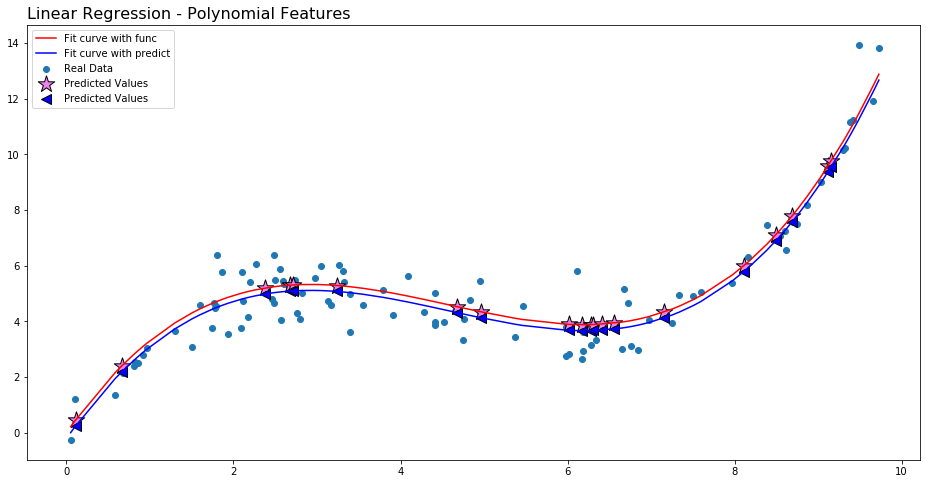

In [79]:
ax, fig = plt.subplots(figsize=(16,8))

plt.scatter(x, y, label='Real Data') ;
plt.plot(xi, lr_poly_results, c='r', label='Fit curve with func');
plt.plot(xi, lr_poly.predict(PolynomialFeatures(4).fit_transform(xi.reshape(-1, 1))), c='b', label='Fit curve with predict');

plt.scatter(x_t, lr_poly_pred, label='Predicted Values', marker='*', color='violet', s=300, edgecolors='k')
plt.scatter(x_t, y_p, label='Predicted Values', marker='<', color='b', s=100, edgecolors='k')


plt.title('Linear Regression - Polynomial Features', fontsize=16, loc='left');
plt.legend();

**Al inputar al modelo de regresión lineal con features polinómicas obtenemos una regresión polinómica. Donde cada coeficiente de la regresión lineal corresponde a lo que acompaña a los grados de la x.**

# SVR - Polynomical Features

In [82]:
# polinomcal features degree 4:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)
x_train_poly = PolynomialFeatures(4).fit_transform(x_train)
x_test_poly = PolynomialFeatures(4).fit_transform(x_test)

In [90]:
# SVR
svr = SVR()
# Lista del parametro lambda (parametro 'alpha')
parameters = {'kernel':['rbf', "linear"] , 'C': [0.01, 0.05, 0.1],'gamma': [0.001, 0.005]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(svr, param_grid=parameters, refit=True)

In [91]:
gs.fit(x_train_poly, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.05, 0.1], 'gamma': [0.001, 0.005],
                         'kernel': ['rbf', 'linear']})

In [92]:
gs.best_params_

{'C': 0.05, 'gamma': 0.001, 'kernel': 'linear'}

In [93]:
svr=SVR(C=0.05, gamma=0.001, kernel="linear")

In [94]:
svr.fit(x_train_poly, y_train)

SVR(C=0.05, gamma=0.001, kernel='linear')

In [95]:
ypredsvr = svr.predict(x_test_poly)

In [96]:
r2_score_svr = r2_score(y_test, ypredsvr)
mse_svr = mean_squared_error(y_test, ypredsvr)
mae_svr = mean_absolute_error(y_test, ypredsvr)

In [97]:
previuos_indexes = results.index

In [98]:
new_indexes = previuos_indexes.append(pd.Index(['Support Vector Regression - Polynomic ft']))

In [99]:
results = results.append({'mse':mse_svr, 'mae':mae_svr, 'r2':r2_score_svr}, ignore_index=True)
results.index = new_indexes

In [100]:
results

,mse,mae,r2
Linear Regression,3.619663,1.453351,0.208754
Linear Regression - Polynomic ft,0.881316,0.691607,0.912623
Support Vector Regression - Polynomic ft,1.035582,0.815891,0.897328


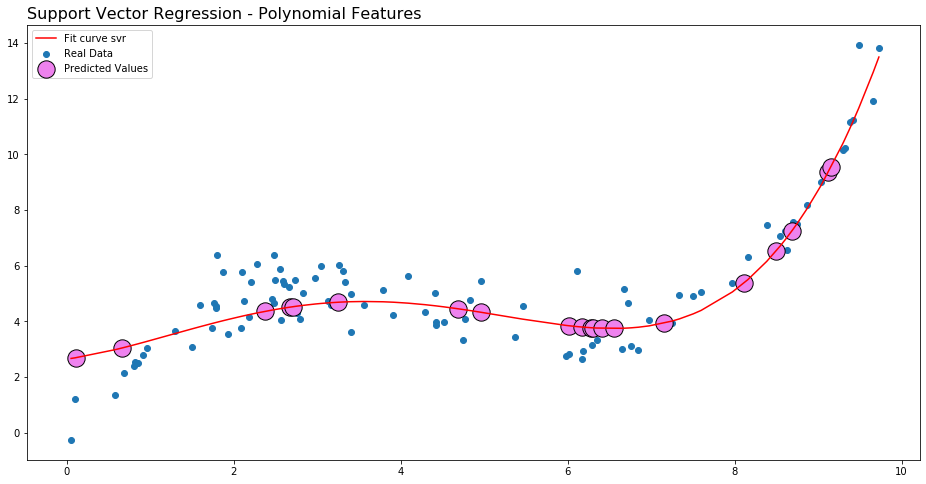

In [101]:
x_t_poly = PolynomialFeatures(4).fit_transform(x_t)
y_p = svr.predict(x_t_poly)

ax, fig = plt.subplots(figsize=(16,8))

plt.scatter(x, y, label='Real Data') ;
plt.plot(xi, svr.predict(PolynomialFeatures(4).fit_transform(xi.reshape(-1, 1))), c='r', label='Fit curve svr');
plt.scatter(x_t, y_p, label='Predicted Values', marker='o', color='violet', s=300, edgecolors='k')

plt.title('Support Vector Regression - Polynomial Features', fontsize=16, loc='left');
plt.legend()

# All 3 models visualization

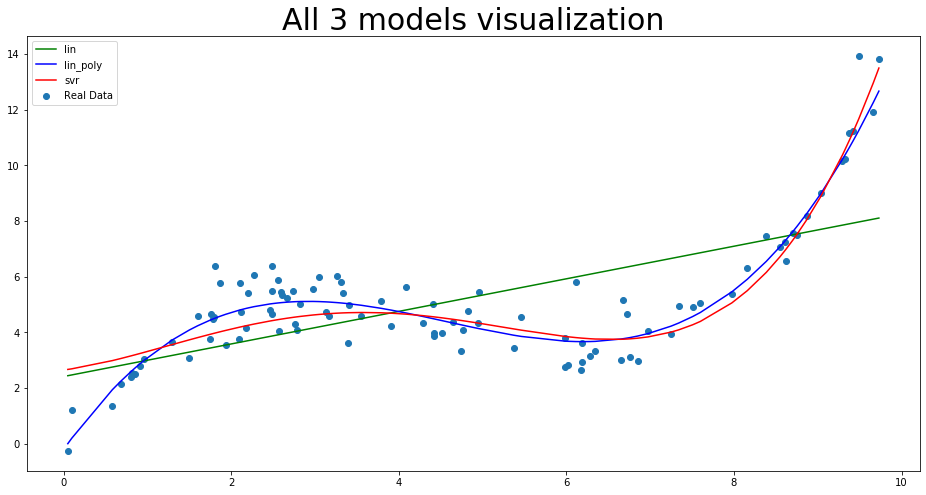

In [108]:
ax, fig = plt.subplots(figsize=(16,8))
plt.scatter(x, y, label='Real Data') ;

lr_linear_ax = plt.plot(xi, lr.predict(xi.reshape(-1, 1)),
                      c='g', label='lin');

lr_poly_ax = plt.plot(xi, lr_poly.predict(PolynomialFeatures(4).fit_transform(xi.reshape(-1, 1))),
                      c='b', label='lin_poly');

svr_ax = plt.plot(xi, svr.predict(PolynomialFeatures(4).fit_transform(xi.reshape(-1, 1))),
                  c='r', label='svr');

plt.title('All 3 models visualization', fontsize=30, loc='center');
plt.legend()

# Resultado Final utilizando el mejor método entre los 3: Regresión Lineal con Features Polinómicas.

In [110]:
x_t_poly = PolynomialFeatures(4).fit_transform(x_testeo_final)
results_y = lr_poly.predict(x_t_poly)
results_y

array([3.66448891, 3.66908989, 7.5730499 , 4.97911237, 5.09068083,
       3.7218711 , 6.88886757, 0.24948657, 9.37371012, 5.08444533,
       5.07083435, 3.68534539, 9.54947046, 2.17532874, 4.30836037,
       5.77951535, 4.12809111, 3.67716644, 4.11352631, 3.66728556])